IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Tarea 01 – Cargando y Analizando Datos

- **Fecha de Entrega:** martes 26 de agosto de 2025, a las 23:59.
- 
**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en el módulo de Tarea 01 habilitado en Canvas.




## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tara.

- Deben hacer sus consultas y comentarios sobre la Tarea a traves del canal de Tareas en eo del curso en Canvas.os.
cteriza.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Para esta tarea, tendremos como objetivo comprender cómo han cambiado los juegos de mesa en los últimos 40 años. Específicamente queremos saber qué tipos de juegos se han vuelto más comunes hoy en día y qué los caracteriza.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

## 2. Datos

Estaremos utilizando información extraída desde [BoardGameGeek.com](https://boardgamegeek.com/), una plataforma para aficionados de los juegos de mesa, que permite a sus usuarios registrar, calificar e intercambiar sus juegos favoritos. Actualmente, BGG es una de las bases de datos más extensa y diversa de juegos de mesa.

El dataset con el que trabajaremos consiste en un grupo de archivos CSV que contienen información sobre más de 100.000 juegos de mesa almacenados en la plataforma. Este puede descargarse directamente desde el siguiente enlace: https://www.kaggle.com/datasets/mshepherd/board-games Para descargar los datos, haga click en el botón de **Download**, donde podrá descargar los archivos como `.zip`, o bien utilizar la API de Kaggle.

Para el desarrollo de esta tarea, solo utilizaremos los archivos con el prefijo `bgg_`.

**Si utiliza la API de Kaggle para descargar los datos, deje el código utilizado en la siguiente celda:**

In [1]:
# Descarga de datos desde Kaggle

### 2.1 Librerías

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y Markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 DataFrame unificado (1 punto)

Vamos a cargar en un DataFrame los datos de juegos guardados en el documento `bgg_GameItem.csv`. Al inspeccionar nuestros datos, podemos notar que los valores de ciertas comunas vienen "codificados" con ID. Para comenzar, vamos a juntar la información de los distintos archivos descargados.

**a) (0.8 pts)** Genere un DataFrame único con toda la información de cada juego, incluyendo: nombres de artistas y diseñadores involucrados, mecánicas, categorías, tipo, familia y editorial. Guarde este DataFrame en un nuevo archivo CSV.

In [3]:
path = "data_2025/bgg_GameItem.csv" # Colocar PATH acorde la ubicacion de los datos descargados
games = pd.read_csv(path)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113904 entries, 0 to 113903
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   bgg_id               113904 non-null  int64  
 1   name                 113904 non-null  object 
 2   year                 104219 non-null  float64
 3   game_type            25830 non-null   object 
 4   designer             95653 non-null   object 
 5   artist               47872 non-null   object 
 6   publisher            113852 non-null  object 
 7   min_players          111966 non-null  float64
 8   max_players          108448 non-null  float64
 9   min_players_rec      111966 non-null  float64
 10  max_players_rec      108448 non-null  float64
 11  min_players_best     111966 non-null  float64
 12  max_players_best     108448 non-null  float64
 13  min_age              90641 non-null   float64
 14  min_age_rec          1126 non-null    float64
 15  min_time         

Los valores codificados vienen como un string de la forma `"id1,id2,...idN"`, donde cada ID es un número entero. Vamos a crear unas funciones de utilidad.

In [4]:
from typing import List

def str2list(x: str) -> List[int]:
    # Para transformar strings de forma "id1,id2,..."" en listas [id1, id2, ...]
    if x is None or x == '':
        return []
    return [int(i) if i.isnumeric() else None for i in str(x).split(',')]

def search_by_game_id(id_value: int, df: pd.DataFrame) -> str:
    # Busca el valor a partir de su bgg_id y un dataframe
    # El DataFrame tendrá dos columnas: bgg_id y name
    by_id = df[df.bgg_id == id_value]
    if by_id.shape[0] == 0:
        return None
    return df[df.bgg_id == id_value].values[0][1]

def read_numbers(x: str, df: pd.DataFrame) -> List[str]:
    id_list = str2list(x)
    name_list = []
    for i in id_list:
        name = search_by_game_id(i, df)
        if name:
            name_list.append(name)
    return name_list

In [6]:
# Carga de datos complementarios - Esta celda puede tardar 3-4 min! Paciencia...
publisher_df = pd.read_csv("data_2025/bgg_Publisher.csv")
category_df = pd.read_csv("data_2025/bgg_Category.csv")
mechanic_df = pd.read_csv("data_2025/bgg_Mechanic.csv")
person_df = pd.read_csv("data_2025/bgg_Person.csv")
family_df = pd.read_csv("data_2025/bgg_GameFamily.csv")
gametype_df = pd.read_csv("data_2025/bgg_GameType.csv")

list_columns = ['publisher', 'category', 'mechanic', 'designer', 'artist', 'family', 'game_type']
list_dataframes = [publisher_df, category_df, mechanic_df, person_df, person_df, family_df, gametype_df]

# El formato final de las columnas puede ser List[str], str con nombres separados por comas
# O bien algo similar
for col_name, dataframe in zip(list_columns, list_dataframes):
    # Tranforma columna en una List[str]
    games[col_name] = games[col_name].apply(lambda x: read_numbers(x, dataframe))
    # Transforma columna en un str con nombres separados por comas
    games[col_name] = games[col_name].apply(lambda x: ','.join(x) if isinstance(x, list) else x)

In [7]:
# Guardar DataFrame unificado
games.to_csv("data_2025/full_dataframe.csv", index=False)

In [8]:
# Si queremos volver a cargar el DF,
# no tenemos que procesarlo de nuevo!
games = pd.read_csv("data_2025/full_dataframe.csv")

**b) (0.2 pts)** ¿Cuánto espacio en disco ocupa este DataFrame? ¿Cuánto espacio en disco ocupan los documentos CSV separados? ¿A qué se debe esta diferencia? Comente.



Todos los documentos juntos ocupan alrededor de 17 MB. En cambio, nuestro nuevo dataset unificado ocupa cerca de 30 MB. Esto se debe a que almacenar strings largos, como una lista de nombres o características separadas por comas ocupará más bytes que strings pequeños, como números de 4 dígitos.

Aunque sea una diferencia leve entre un string de nombres y otro de números, estas se acumulan, y para un dataset de más de 100.000 filas, termina significando múltiples MB de espacio. Por esta razón muchas veces es más eficiente almacenar datos en tablas o archivos separados (sobre todo para datasets mucho más grandes!).

In [ ]:
import sys

# Un ejemplo, no es necesario como respuesta mientras haya una buena explicación 
print(f"Categoría codificada (ejemplo > '1041,1094,1045'): {sys.getsizeof("1041,1094,1045")} bytes")
print(f"Categoría decodificada (ejemplo > 'Children's Game,Educational,Memory'): {sys.getsizeof("Children's Game,Educational,Memory")} bytes")


### 3.2 Juegos publicados anualmente (1.5 puntos)


**a) (0.5 pts)** Limpie los datos para dejar solo aquellos que tienen valores válidos de año de publicación. Luego responda: ¿cuál es el rango de años con el que estamos trabajando? ¿Tienen sentido estos años?


In [10]:
games_filter1 = games[games.year.notna()].copy()
games_filter1['year'] = games_filter1['year'].astype(int)
print(games_filter1.shape)

(104219, 38)


In [11]:
# Juego más antiguo
games_filter1[games_filter1.year == games_filter1.year.min()]

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,...,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
2060,2399,Senet,-3500,Abstract Game,(Uncredited),"Johan Andreasson,Elizabeth Carpenter,David McC...","(Public Domain),(Self-Published),ABRA,Cadaco,C...",2.0,2.0,2.0,...,1.66428,5.56898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Juego más nuevo
games_filter1[games_filter1.year == games_filter1.year.max()]

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,...,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
87637,279876,Template of War,2026,NaN,"Eric Beevis,Paul Toderas",NaN,(Self-Published),1.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99711,331318,Citytrip Junior,2026,NaN,Christof Van Conkelberge,Christof Van Conkelberge,(Self-Published),1.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


El juego más antiguo en nuestro dataset es el "[Senet](https://es.wikipedia.org/wiki/Senet)", del 3500 AC. Los juegos más recientes son Template of War y Citytrip Junior del 2026.


Podemos considerar "válidos" ambos extremos, siendo los juegos de 2026 aquellos que están anunciados, pero no publicados aún. Ahora sabemos que BoardGameGeek tiene registros de juegos de hace más de 5000 años (!), lo que sugiere establecer un rango de años más acotado para analizar.

**b) (0.5 pts)** Seleccione solamente los juegos entre los años 1980 y 2025. Luego grafique la cantidad de juegos publicados por año. ¿Cómo es esta tendencia? Comente.

In [13]:
games_in_range = games_filter1[(games_filter1.year > 1980) & (games_filter1.year < 2025)]
by_year = games_in_range.groupby(by='year').size().reset_index(name='count')
by_year.head()

,year,count
0,1981,623
1,1982,586
2,1983,733
3,1984,777
4,1985,855


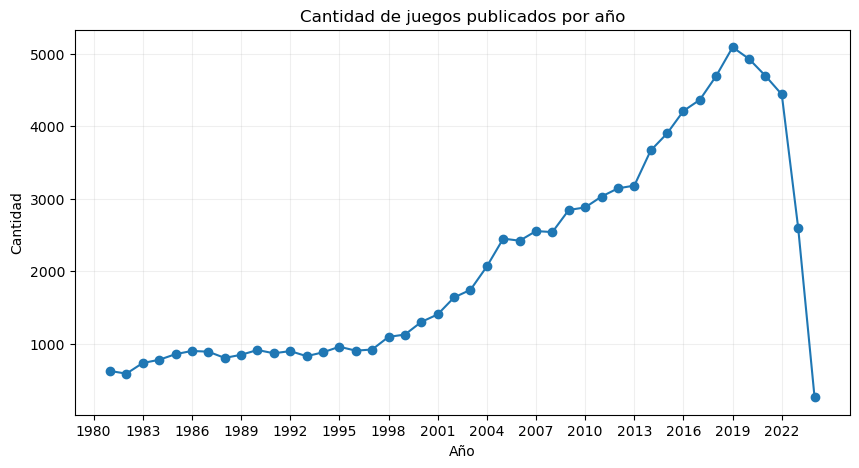

In [14]:
# Graficar con by_year
fig = plt.figure(figsize=(10, 5))
plt.plot(by_year['year'], by_year['count'], marker='o')

plt.title('Cantidad de juegos publicados por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(alpha=0.2)
plt.xticks(range(1980, 2025, 3))
plt.show()

Posibles comentarios:
* El gráfico muestra un crecimiento constante en la cantidad de juegos registrados desde inicios del 1980.
* También vemos una caída desde el 2019, primero leve y finalmente drástica hacia el 2025, donde no parecemos tener ningún juego registrado este último año.
* Esta caída **no** indica necesariamente que se haya desplomado la publicación de juegos en los últimos años; más bien indica que tenemos muchos menos datos disponibles debido a la fecha en la que fueron extraídos los datos de la plataforma. Debemos tener cuidado con esta caída al analizar los juegos más adelante.

**c) (0.5 pts)** ¿Entre qué años hubo un mayor aumento de publicación de juegos de mesa según los registros de BGG?

In [15]:
# Si consideramos el aumento absoluto, simplemente vemos la diferencia entre cada año
by_year['increase'] = by_year['count'].diff().fillna(0)
by_year.sort_values('year', ascending=False).head()

,year,count,increase
43,2024,261,-2336.0
42,2023,2597,-1839.0
41,2022,4436,-257.0
40,2021,4693,-233.0
39,2020,4926,-161.0


In [16]:
max_increase = by_year[by_year.increase == by_year.increase.max()]
y = max_increase.year.values[0]
num = max_increase.increase.values[0]
print(f"Entre {y-1} y {y} hubo el mayor aumento absoluto en cantidad de juegos.")
print(f"Según nuestros registros, se publicaron {int(num)} juegos nuevos.")

Entre 2013 y 2014 hubo el mayor aumento absoluto en cantidad de juegos.
Según nuestros registros, se publicaron 484 juegos nuevos.


### 3.3 Análisis de duración y complejidad (1.5 puntos)

Si bien hay muchas posibles características que podemos explorar para los juegos de mesa, esta vez nos centraremos en el tiempo de juego y la complejidad. En esta sección queremos comprender si se ha modificado notablemente la duración promedio y la percepción de complejidad de los juegos de mesa a través de los años.

**a) (0.3 pts)** Inspecciones y filtre los datos que tengan valores válidos para: tiempo mínimo de juego, tiempo máximo de juego y complejidad. En el caso de que existan "outliers", puede descartarlos, cosiderando un rango razonable para las variables anteriores. Justifique su desición.

In [17]:
# Descartamos cualquier valor nulo para los 3 atributos
games_filter2 = games[(games.min_time.notna()) &
              (games.max_time.notna()) &
              (games.complexity.notna())].copy()
games_filter2.shape

(43454, 38)

In [18]:
# Inspeccionamos los datos 
games_filter2[['min_time', 'max_time', 'complexity']].describe()

,min_time,max_time,complexity
count,43454.000000,43454.000000,43454.000000
mean,58.699291,87.706218,1.904462
std,433.832809,733.971386,0.823448
min,1.000000,1.000000,1.000000
25%,20.000000,20.000000,1.000000
50%,30.000000,45.000000,1.972950
75%,60.000000,90.000000,2.408875
max,60120.000000,84000.000000,5.000000


Para complejidad los valores se mueven entre 1 y 5, lo que tiene sentido con el atributo, por lo que no parece haber ningún "outlier". Sin embargo, para los atributos de tiempo, existen valores máximos extremos de 60.120 (para `min_time`) minutos a 84.000 minutos (`max_time`).

Podemos inspeccionar estos valores particulares.

In [19]:
games_filter2[(games_filter2.min_time > 60_000) | (games_filter2.max_time > 60_000)][['name', 'min_time', 'max_time', 'game_type', 'year']]

,name,min_time,max_time,game_type,year
10114,The Eagle and the Sun,120.0,84000.0,War Game,1991.0
63469,Hammer's Slammers: The Crucible,60120.0,60120.0,NaN,2010.0
97312,Operation Crusader: The Winter Battles for Tob...,240.0,72000.0,War Game,2021.0


Estos valores podrían distorsionar el promedio de tiempo de juego que queremos calclular, por lo tanto vamos a descartarlos. Aquí pueden descartarse valores de distintas formas: podemos ignorar juegos específicos, seleccionándolos individualmente (si es que son los juegos más largos), o bien establecer un rango de tiempo límite. 

Como ejemplo, vamos a considerar solo juegos cuyo tiempo (sea mínimo o máximo) sea menor a 1 día (1440 minutos), para quedarnos con hartos datos, pero descartando valores extremos como los vistos anteriormente.

Esta decisión puede variar de alumno a alumno: lo importante es la justificación, y que ojalá se muestre cuántos juegos estamos descartando o considerando "outliers".

In [20]:
# Siendo 24*60 la cantidad de minutos en un día
games_filter3 = games_filter2[(games_filter2.min_time < 24*60) & (games_filter2.max_time < 24*60)] 

# Cantidad de juegos descartados
print("Juegos descartados: ", games_filter2.shape[0] - games_filter3.shape[0])
print("Tamaño dataset filtrado: ", games_filter3.shape[0])

Juegos descartados:  128
Tamaño dataset filtrado:  43326


**b) (0.2 pts)** Veremos ahora si ha cambiado la duración promedio de los juegos de mesa en nuestro rango de años seleccionado. Primero, cree una nueva columna `avg_time` en el dataset con la duración promedio supuesta para cada juego.

In [21]:
games_filter2['avg_time'] = games_filter2.apply(lambda row: np.mean([row['min_time'], row['max_time']]), axis=1)

**c) (0.5 pts)** Grafique la duración promedio de juegos al año entre 1980 y 2025. ¿Existe alguna tendencia? Asegúrese de colocar las unidades correspondientes en sus ejes si es necesario. Comente sus resultados.

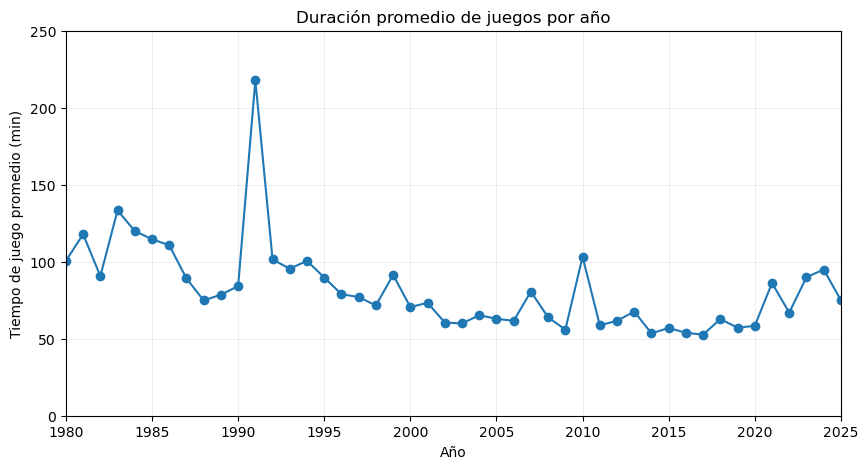

In [22]:
data = games_filter2[['year', 'avg_time']].groupby('year').mean().reset_index()

fig = plt.figure(figsize=(10, 5))
plt.plot(data['year'], data['avg_time'], marker='o')
plt.title('Duración promedio de juegos por año')
plt.xlabel('Año')
plt.ylabel('Tiempo de juego promedio (min)')
plt.grid(alpha=0.2)
plt.xlim((1980, 2025))
plt.ylim((0, 250))
plt.show()


Si bien es leve, desde 1980 el tiempo promedio de un juego de mesa parece haber caído, quedándose cerca de los 50-70 minutos para juegos del 2010 en adelante. Existen ciertos "peaks" en nuestra línea de tiempo, que pueden ocurrir cuando tenemos pocos datos de juegos publicados en un año en particular.

**d) (0.5 pts)** Nos interesa saber si los juegos de mesa recientes son más complejos que aquellos publicados antes de los 2000. BoardGameGeek permite evaluar la complejidad (o "weight") de un juego en una escala de 1 a 5, siendo 1 un juego "liviano" o fácil de entender, y 5 un juego "pesado" o complejo. Primero, seleccione los juegos que han sido evaluados por al menos 100 usuarios. Luego grafique la complejidad promedio de los juegos según año. Responda: ¿ha cambiado la percepción de complejidad entre juegos entre 1980 y la actualidad?

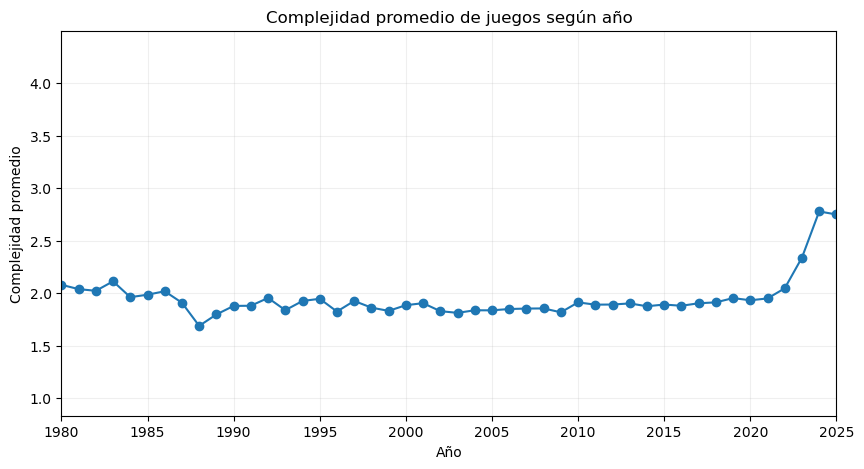

In [23]:
# Filtramos solo juegos con al menos 100 votos
games_filter3 = games[games.num_votes >= 100]

# Agrupamos segun año, calculando la complejidad promedio por año
by_complexity = games_filter3[['year', 'complexity']].groupby('year').mean().reset_index()

# Graficamos
data = games[['year', 'complexity']].groupby('year').mean().reset_index()
fig = plt.figure(figsize=(10, 5))
plt.plot(data['year'], data['complexity'], marker='o')
plt.title("Complejidad promedio de juegos según año")
plt.xlabel('Año')
plt.ylabel('Complejidad promedio')
plt.grid(alpha=0.2)
plt.xlim((1980, 2025))
plt.show()


No podemos concluir que haya habido un cambio significativo en la percepción de complejidad entre juegos de mesa en los últimos 40 años. Si bien vemos un aumento en la complejidad  desde el 2023 en adelante, esto se debe a la baja cantidad de juegos que contiene el dataset en estos años, más que a una tendencia "confiable" de que los juegos se hayan vuelto más complejos.

### 3.4 Análisis de categorías comunes (2 puntos)

Existe una gran diversidad de categorías de juegos de mesa. Ahora nos concentraremos en un grupo específico de ellas, con el fin de analizar cómo a cambiado la cantidad de juegos de estas clases desde 1980 hasta hoy.

**a) (0.7 pts)** ¿Cuáles son las 5 categorías más comunes en los juegos del dataset? Muestre la cantidad de juegos que hay de cada una. Puede graficar estos valores, o bien, entregar un DataFrame con sus valores.

In [24]:
# Podemos crear una función de utilidad
def count_appearances(df: pd.DataFrame, col_name: str):
    data = df[(df[col_name].notna())]
    counts = dict()
    for i in range(data.shape[0]):
        row = data.iloc[i]
        for v in row[col_name].split(','):
            v = str(v)
            if v in counts.keys():
                counts[v] += 1
            else:
                counts[v] = 1
    return counts

In [25]:
counts = count_appearances(games, 'category')
category_counts = pd.DataFrame(counts, index=[0]).T.reset_index(names="name")
category_counts = category_counts.rename(columns={0: "count"})
category_counts

,name,count
0,Economic,6819
1,Negotiation,3417
2,Political,2074
3,Card Game,29070
4,Fantasy,8946
...,...,...
79,Mature / Adult,1269
80,Vietnam War,264
81,Korean War,113
82,Expansion for Base-game,300


In [26]:
# Obtenemos las categorías con mayor valor en "count"
category_counts.sort_values("count", ascending=False).head(5)

,name,count
3,Card Game,29070
11,Children's Game,15488
27,Wargame,14577
40,Party Game,10722
20,Dice,10308


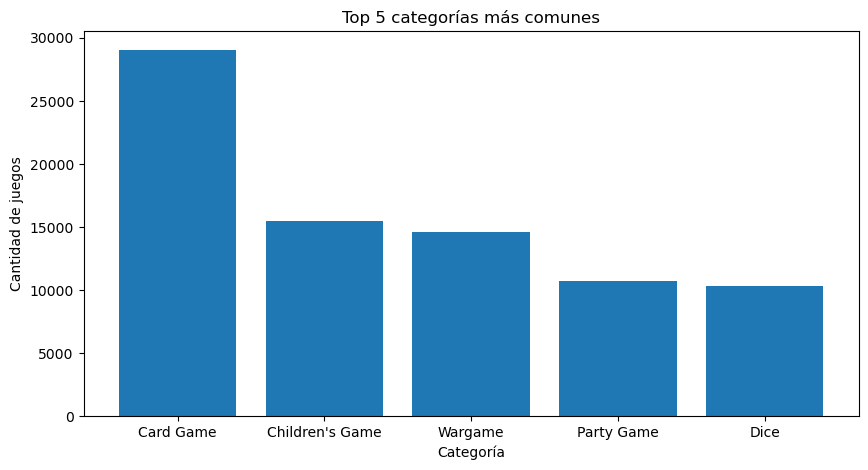

In [27]:
# Opcionalmente podemos graficar estas cantidades
data = category_counts.sort_values("count", ascending=False).head(5)
fig = plt.figure(figsize=(10, 5))
plt.bar(data['name'], data['count'])
plt.title("Top 5 categorías más comunes")
plt.xlabel('Categoría')
plt.ylabel('Cantidad de juegos')
plt.show()


**b) (0.3 pts)** Para cada una de estas 5 categorías, cree un DataFrame que contenga la cantidad de juegos en el dataset según año. Luego junte estos DataFrames en uno solo con los atributos de "Año", "Categoría" y "Cantidad".

In [28]:
# Obtenemos los nombres de las 5 categorias
top5_cats = category_counts.sort_values("count", ascending=False).head(5)['name'].values

# Podemos crear un array para guardar cada DataFrame, uno por categoria
category_dataframes = []

for cat in top5_cats:
    # Filtramos solo aquellos juegos que contienen a la categoria
    games_in_category = games[games.category.str.contains(cat, na=False)]
    # Agrupamos por año
    category_by_year = games_in_category.groupby('year').size().reset_index(name='count')
    # Agregamos este DataFrame al array
    category_dataframes.append(category_by_year)


In [29]:
# Como resultado tenemos 5 DataFrames
i = 0

print(f'Mostrando DataFrame para Categoría: {top5_cats[i]}')
category_dataframes[i].sort_values('year', ascending=False)

Mostrando DataFrame para Categoría: Card Game


,year,count
222,2025.0,5
221,2024.0,58
220,2023.0,889
219,2022.0,1612
218,2021.0,1684
...,...,...
4,1426.0,1
3,1425.0,2
2,1200.0,1
1,1120.0,1


**c) (1 pto)** Grafique, en un solo gráfico y con distintos colores, la cantidad de juegos por año según categoría. Preocúpese de ponerle etiquetas al gráfico para identificar cada categoría y una leyenda donde se muestre cada una. Comente: ¿ha habido un cambio entre los juegos más comunes en los años 80 y hoy?


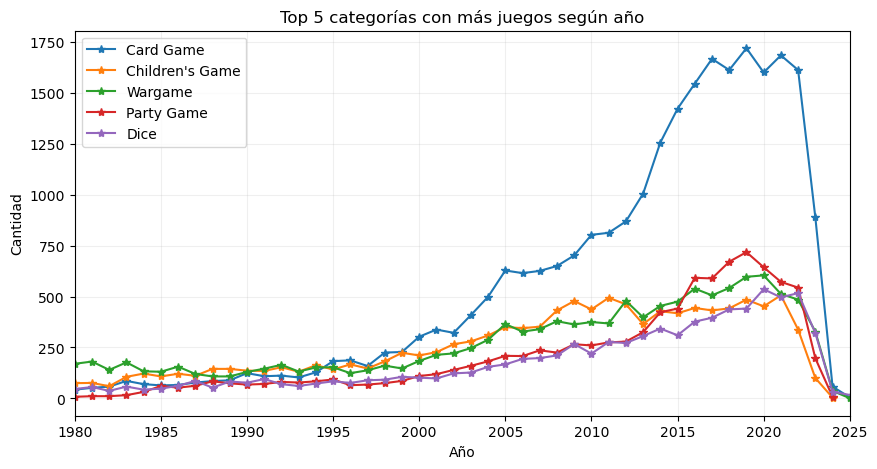

In [30]:
# Graficamos, una linea por categoria
fig = plt.figure(figsize=(10,5))

for cat_name, cat_df in zip(top5_cats, category_dataframes):
    plt.plot(cat_df['year'], cat_df['count'], marker='*', label=cat_name)

plt.title("Top 5 categorías con más juegos según año")
plt.xlabel("Año")
plt.ylabel('Cantidad')
plt.grid(alpha=0.2)
plt.legend()
plt.xlim((1980, 2025))
plt.show()

Posibles comentarios:
* Existe una explosión de juegos de cartas desde el 2000 en adelante, cuyo crecimiento es mucho más marcado que para otras categorías de juego.
* A inicios de los 80, los juegos de guerra eran los más comunes, y existían pocos juegos categorizados como "Party Games". Sin embargo, en años recientes, se nota el crecimiento de Party Games, con un aumento notorio entre 2013 y 2017. Últimamente estos superan en publicaciones anuales a los juegos de guerra.
*


### 3.5 Análisis Crítico (Bono +0.5 puntos)

¿Qué limitaciones o problemas encontraste en los datos?

*